In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import heatmap
import math
import tensorflow as tf

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# Data Analysis

In [17]:
data = [pd.read_csv('/content/user_' + user_tag + '.csv') for user_tag in ['a', 'b', 'c', 'd']]
original_dataset = pd.concat(data, axis = 0).sample(frac = 1.0, random_state = 34).reset_index(drop = True)

original_columns = original_dataset.columns
original_features = original_columns[1:]
original_target = original_columns[0]

dataset = original_dataset.copy()
columns = dataset.columns
features = columns[1:]
target = columns[0]

In [5]:
#Check for missing/zero data:

missing_count = (dataset[features].isnull().sum())/(len(dataset[features]))
print(f"Number of features: {len(features)}")
print(f"Number of features without missing/zero data: {missing_count.isnull().count()}")

Number of features: 112
Number of features without missing/zero data: 112


Text(0, 0.5, 'Number of actions')

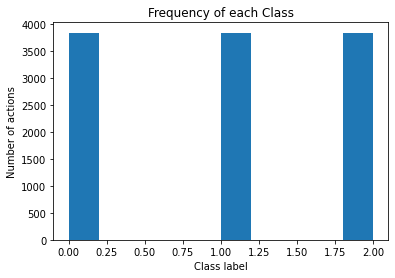

In [6]:
#Check number of data available for each class:

fig, ax = plt.subplots()
ax.hist(dataset[target])
ax.set_title('Frequency of each Class')
ax.set_xlabel('Class label')
ax.set_ylabel('Number of actions')

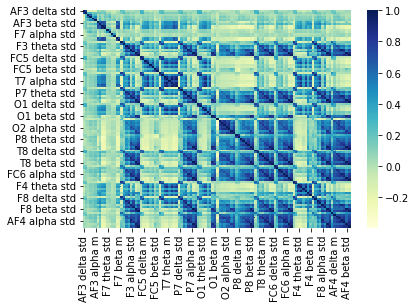

In [18]:
#Check Correlation between the features using heatmap:

EEG_data = pd.DataFrame(dataset[features], columns = features)
EEG_data_correlation = EEG_data.corr()
sns.heatmap(EEG_data_correlation, cmap = 'YlGnBu')

In [8]:
#Check number of occurences of Correlation > 0.75 between the features:

cr_count = 0
print("Feature: (Correlation > 0.75) count\n")
for y in range(len(EEG_data_correlation)):
  cr_count = 0
  for x in EEG_data_correlation[features[y]]:
    if abs(x) > 0.75:
      cr_count += 1
  print(f"{features[y]}: {cr_count - 1}")

Feature: (Correlation > 0.75) count

AF3 delta std: 1
AF3 delta m: 1
AF3 theta std: 0
AF3 theta m: 0
AF3 alpha std: 0
AF3 alpha m: 0
AF3 beta std: 0
AF3 beta m: 0
F7 delta std: 3
F7 delta m: 1
F7 theta std: 0
F7 theta m: 0
F7 alpha std: 0
F7 alpha m: 0
F7 beta std: 1
F7 beta m: 0
F3 delta std: 4
F3 delta m: 4
F3 theta std: 9
F3 theta m: 10
F3 alpha std: 20
F3 alpha m: 19
F3 beta std: 15
F3 beta m: 30
FC5 delta std: 4
FC5 delta m: 6
FC5 theta std: 1
FC5 theta m: 7
FC5 alpha std: 0
FC5 alpha m: 0
FC5 beta std: 1
FC5 beta m: 1
T7 delta std: 6
T7 delta m: 6
T7 theta std: 7
T7 theta m: 10
T7 alpha std: 0
T7 alpha m: 10
T7 beta std: 6
T7 beta m: 10
P7 delta std: 5
P7 delta m: 7
P7 theta std: 11
P7 theta m: 10
P7 alpha std: 21
P7 alpha m: 20
P7 beta std: 16
P7 beta m: 29
O1 delta std: 5
O1 delta m: 7
O1 theta std: 1
O1 theta m: 9
O1 alpha std: 0
O1 alpha m: 4
O1 beta std: 15
O1 beta m: 9
O2 delta std: 0
O2 delta m: 5
O2 theta std: 7
O2 theta m: 6
O2 alpha std: 12
O2 alpha m: 8
O2 beta std: 7


# Data Preprocessing

In [19]:
#Feature selection based on correlation count:
#Remove feature if count > 5:

dataset_new = EEG_data_correlation.copy()
cr_count = 0

for y in range(len(EEG_data_correlation)):
  cr_count = 0
  for x in EEG_data_correlation[features[y]]:
    if abs(x) > 0.75:
      cr_count += 1
  if (cr_count - 1) > 5:
    dataset_new = dataset_new.drop(features[y], axis = 1)

features_new = []
for x in dataset_new.columns:
  features_new.append(x)

dataset_new = dataset.copy()
for x in features:
  if x not in features_new:
    dataset_new = dataset_new.drop(x, axis = 1)

dataset = dataset_new.copy()
columns = dataset.columns
features = columns[1:]
target = columns[0]

# Models Used

K-Nearest Neighbors model (KNN):

Accuracy score with no scaling:        80.56 %
Accuracy score with Standard scaled:   81.21 %
Accuracy score with MinMax scaled:     73.22 %




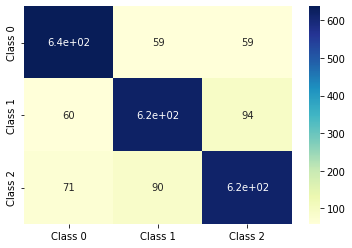

In [21]:
#Data preprocessing:

dataset_knn = dataset.copy()
drop_columns = ["alpha", "beta", "theta"]

for x in range(len(features)):
  column_mid = features[x].split()
  if column_mid[1] in drop_columns:
    dataset_knn = dataset_knn.drop(features[x], axis = 1)

columns_knn = dataset_knn.columns
features_knn = columns_knn[1:]
target_knn = columns_knn[0]


#Model Implementation and Evaluation:

x_train, x_test, y_train, y_test = train_test_split(dataset_knn[features_knn], dataset_knn["Class"], test_size = 0.20, 
                                                    random_state = 47, stratify = dataset_knn["Class"])
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print("Accuracy score with no scaling:        {:.2f} %".format(np.mean(y_pred == y_test)*100))

scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

knn.fit(x_train_scaled, y_train)
y_pred = knn.predict(x_test_scaled)
matrix = confusion_matrix(y_pred, y_test)
print("Accuracy score with Standard scaled:   {:.2f} %".format(np.mean(y_pred == y_test)*100))

scaler = MinMaxScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

knn.fit(x_train_scaled, y_train)
y_pred = knn.predict(x_test_scaled)
print("Accuracy score with MinMax scaled:     {:.2f} %\n\n".format(np.mean(y_pred == y_test)*100))

heatmap(matrix , cmap = 'YlGnBu', xticklabels=['Class 0', 'Class 1', 'Class 2'], 
        yticklabels=['Class 0', 'Class 1', 'Class 2'], annot = True)



Multi-Layer Perceptron model (MLP):

In [11]:
#Data preprocessing:

dataset_nn = original_dataset.copy()
columns_nn = dataset_nn.columns
features_nn = columns_nn[1:]
target_nn = columns_nn[0]

x_train, x_test, y_train, y_test = train_test_split(dataset_nn[features_nn], dataset_nn["Class"], test_size = 0.20, 
                                                    random_state = 47, stratify = dataset_nn["Class"])
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)


#Building a MLP architecture:

def MLP(class_count):
  input = tf.keras.Input(shape = (x_train_scaled.shape[1]))
  x = tf.keras.layers.Dense(256, activation = 'relu')(input)
  x = tf.keras.layers.Dense(256, activation = 'relu')(x)
  output = tf.keras.layers.Dense(class_count, activation = 'softmax')(x)

  model = tf.keras.Model(inputs = input, outputs = output)
  model.compile(optimizer = 'nadam',
                loss = 'sparse_categorical_crossentropy', 
                metrics = ['accuracy'])
  return model


#Model Implementation and Evaluation:

MLP = MLP(class_count = np.sum(np.unique(dataset_nn["Class"])))
history = MLP.fit(x_train_scaled, y_train, validation_split = 0.2, batch_size = 16, epochs = 15, verbose = 0)

accuracy = MLP.evaluate(x_test_scaled, y_test, verbose = 0)[1]
print("Accuracy score with Standard scaled:     {:.2f} %".format(accuracy*100))

Accuracy score with Standard scaled:     67.75 %


Decision Tree model (DT):

Accuracy score with no scaling:     67.36 %




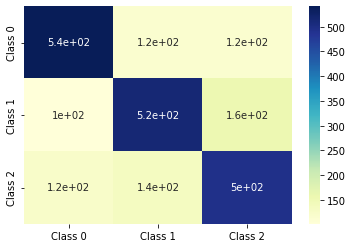

In [23]:
#Data preprocessing:

dataset_t = original_dataset.copy()
drop_columns = ["alpha", "beta", "theta"]

for x in range(len(original_features)):
  column_mid = original_features[x].split()
  if column_mid[1] in drop_columns:
    dataset_t = dataset_t.drop(original_features[x], axis = 1)

columns_t = dataset_t.columns
features_t = columns_t[1:]
target_t = columns_t[0]

x_train, x_test, y_train, y_test = train_test_split(dataset_t[features_t], dataset_t["Class"], test_size = 0.20, 
                                                    random_state = 47, stratify = dataset_t["Class"])


#Model Implementation and Evaluation:

DT = DecisionTreeClassifier(criterion = 'entropy', random_state = 3)
DT.fit(x_train, y_train)
prediction = DT.predict(x_test)

print("Accuracy score with no scaling:     {:.2f} %\n\n".format(np.mean(prediction == y_test)*100))

matrix = confusion_matrix(prediction, y_test)
heatmap(matrix , cmap = 'YlGnBu', xticklabels=['Class 0', 'Class 1', 'Class 2'], 
        yticklabels=['Class 0', 'Class 1', 'Class 2'], annot = True)